In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [2]:
# 1. Download the data file above and read it into a pandas DataFrame.
df = pd.read_csv('data/homes.csv')

In [23]:
df = df.rename(columns=lambda x: x.replace('"', ''))


In [24]:
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [25]:
df.count()

Sell       50
 List      50
 Living    50
 Rooms     50
 Beds      50
 Baths     50
 Age       50
 Acres     50
 Taxes     50
dtype: int64

In [26]:
df.corr()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
List,0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


In [27]:
# 2. Add the code necessary to describe the dataset
df.describe()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sell     50 non-null     int64  
 1    List    50 non-null     int64  
 2    Living  50 non-null     int64  
 3    Rooms   50 non-null     int64  
 4    Beds    50 non-null     int64  
 5    Baths   50 non-null     int64  
 6    Age     50 non-null     int64  
 7    Acres   50 non-null     float64
 8    Taxes   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


# 3. Using markdown commentary describe the dataset 
The dataset has 9 variables about 50 different homes. There are variables which describe what the house is like (rooms, bathrooms, bedrooms, acres, age, etc.) then there is the list price (asking price) and sell (final sale) price. 

In [35]:
# Conduct at least three EDA techniques on the dataset, include markdown commentary
# to describe what you are doing, why you are doing it and the results of each analysis

# Descriptive Statistics
df.describe()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


df.desribe provides count, mean, standard deviation, minimum, quartiles, and maximum for each numerical column in the dataset. From this, we can understand the scale of each feature, detect outliers, and get a sense of the data distribution.

In [38]:
# Correlation Analysis
df.corr()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
List,0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
Living,0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
Rooms,0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
Beds,0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
Baths,0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
Age,-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
Acres,0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
Taxes,0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


This matrix shows how changes in one variable are associated with changes in another. A correlation close to 1 or -1 indicates a strong positive or negative relationship, respectively, while a correlation close to 0 indicates no linear relationship. We can use this EDA data to understand the significant and non-significant datapoints. 

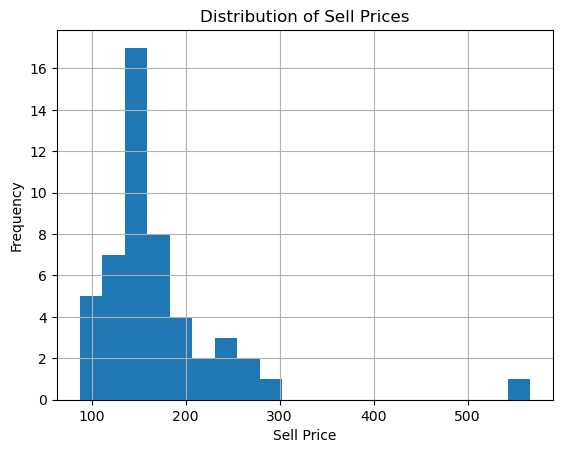

In [34]:
# Histogram for visualization
df['Sell'].hist(bins=20)
plt.title('Distribution of Sell Prices')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.show()

Visualizations help us see patterns, outliers, and the distribution of data that are not apparent from raw data. The histogram allows us to see the skew of the distribution (for 'Sell'). 

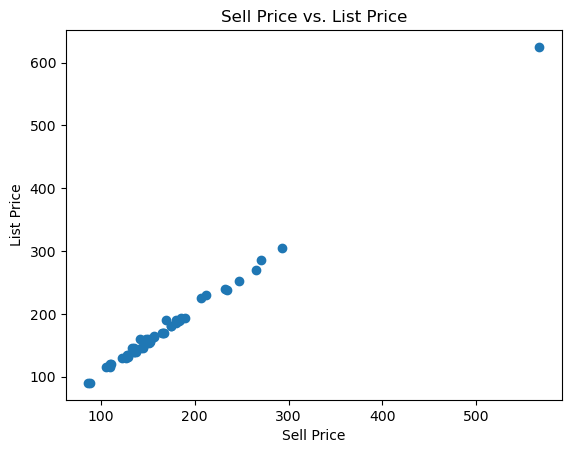

In [41]:
# Scatter plot for Visualization
plt.scatter(df['Sell'], df[' List'])
plt.title('Sell Price vs. List Price')
plt.xlabel('Sell Price')
plt.ylabel('List Price')
plt.show()


In [40]:
print(df.columns)


Index(['Sell', ' List', ' Living', ' Rooms', ' Beds', ' Baths', ' Age',
       ' Acres', ' Taxes'],
      dtype='object')


Visualizations help us see patterns, outliers, and the distribution of data that are not apparent from raw data. The Scatter Plot helps us see the correlation between sell and list price, potentiall identify outliers, and confirm the suspected linearity. 

In [53]:
X = df[' Taxes'].values.reshape(-1, 1)  # Independent variable
y = df['Sell'].values  # Dependent variable

model = sm.OLS(y,X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1571.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                    6.90e-39
Time:                        15:46:32   Log-Likelihood:                         -244.50
No. Observations:                  50   AIC:                                      491.0
Df Residuals:                      49   BIC:                                      492.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0453      0.001     39.634      0.000       0.043       0.048
==============================================================================
Omnibus:                       32.344   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.071
Skew:                           1.829   Prob(JB):                     1.11e-17
Kurtosis:                       7.908   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# In addition to the model output include markdown commentary about the important statistics from the output; is taxes a good predictor for selling price? Why or why not?

Yes, taxes is a great predictor of sell price for the homes in the dataset.  We know this because of the P-value is 0 (or very close to it).  We can also understand this from the R-squared value, 97% of teh variance in the dependent variable can be due to the independent variable (taxes).  Therefore we can conclude taxes is an extremely strong predictor of home price. 

In [57]:
# Repeat this procedure using one of the other variables as the independent variable. 
# Which model is "better"? What are some limitations of the model? 
X = df[' Rooms'].values.reshape(-1, 1)  # Independent variable
y = df['Sell'].values  # Dependent variable

model = sm.OLS(y,X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              399.7
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                    3.28e-25
Time:                        15:54:14   Log-Likelihood:                         -276.59
No. Observations:                  50   AIC:                                      555.2
Df Residuals:                      49   BIC:                                      557.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            21.3941      1.070     19.993      0.000      19.244      23.545
==============================================================================
Omnibus:                       65.271   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.321
Skew:                           3.349   Prob(JB):                    1.07e-128
Kurtosis:                      18.427   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While the p-value is still 0 (or close to it) the R-squared value for rooms compared to sell is less than (.891) the R-squared value for taxes compared to sell (.97), meaning less of the variance in the sell price can be explained by the number of rooms compared to the home taxes. 